In [1]:
import pandas as pd  
import matplotlib.pyplot as plt 
import seaborn as sns  


In [2]:
df = pd.read_csv(r"C:\Users\gpkt2\OneDrive\Desktop\Coral_DataSet\Florida Keys Coral Reef Evaluation Dataset\CREMP_CSV_files\CREMP_OCTO_RawData_2023.csv")
df.info()
df.describe()
df.head()
df.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109246 entries, 0 to 109245
Data columns (total 10 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   Year       109246 non-null  int64  
 1   Date       109246 non-null  object 
 2   Subregion  109246 non-null  object 
 3   Habitat    109246 non-null  object 
 4   SiteID     109246 non-null  int64  
 5   Site_name  109246 non-null  object 
 6   StationID  109246 non-null  int64  
 7   SPP_Code   109246 non-null  object 
 8   sciName    109246 non-null  object 
 9   Height_cm  109244 non-null  float64
dtypes: float64(1), int64(3), object(6)
memory usage: 8.3+ MB


Index(['Year', 'Date', 'Subregion', 'Habitat', 'SiteID', 'Site_name',
       'StationID', 'SPP_Code', 'sciName', 'Height_cm'],
      dtype='object')

In [3]:
species_corals=df.groupby('Year')['sciName'].nunique()
print(species_corals)

Year
2011    5
2012    6
2013    6
2014    6
2015    6
2016    7
2017    7
2018    6
2019    7
2020    7
2021    7
2022    6
2023    6
Name: sciName, dtype: int64


PLOTTING THE CORALS INCREMENT OVER THE YEARS

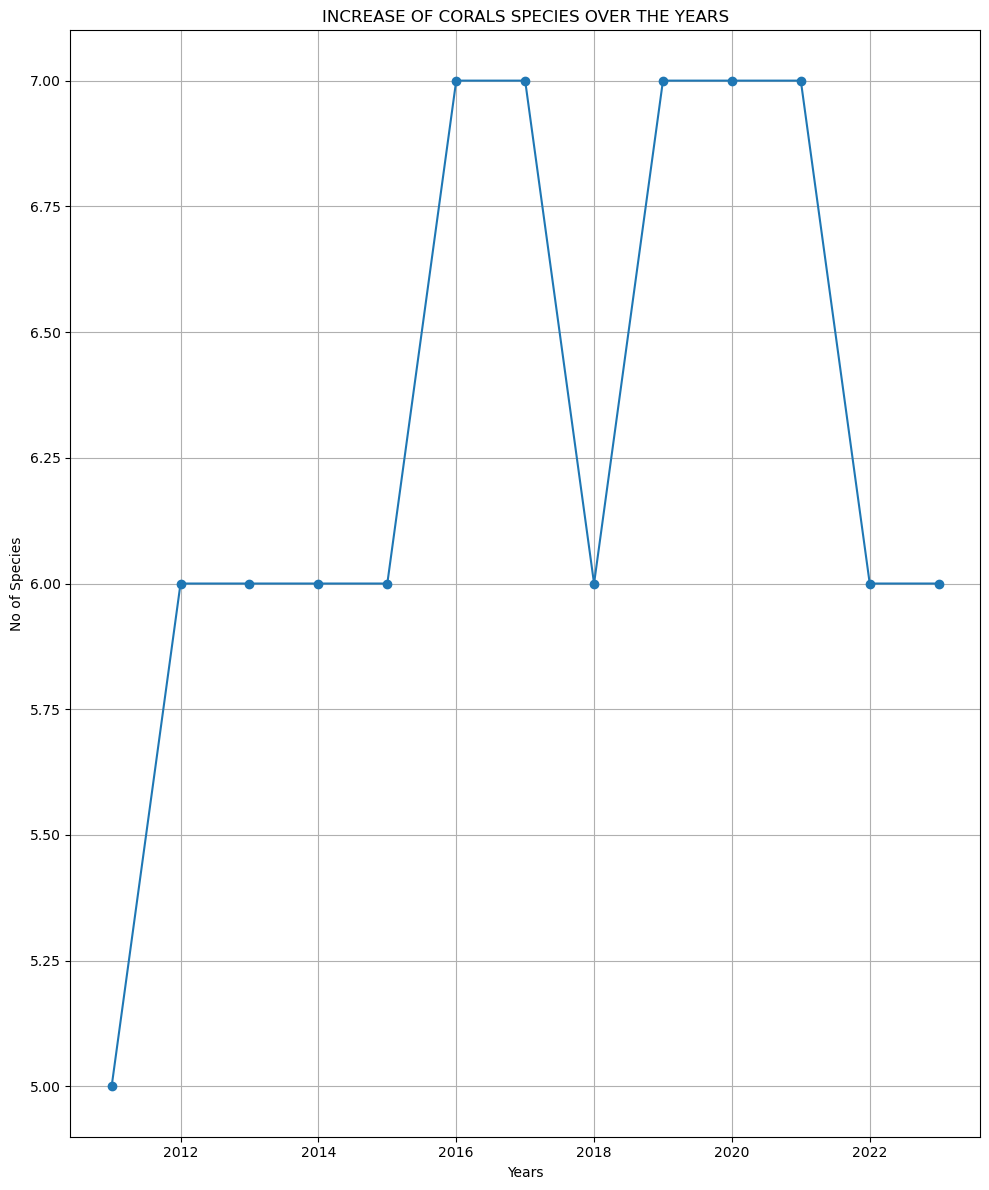

In [4]:
species_corals.plot(figsize=(10,12),marker='o')
plt.title("INCREASE OF CORALS SPECIES OVER THE YEARS")
plt.xlabel("Years")
plt.ylabel("No of Species")
plt.tight_layout()
plt.grid(True)
plt.show()

Year  StationID
2011  321          4
      322          4
      323          5
      324          5
      331          3
                  ..
2023  794          2
      811          5
      812          4
      813          4
      814          4
Name: sciName, Length: 1021, dtype: int64


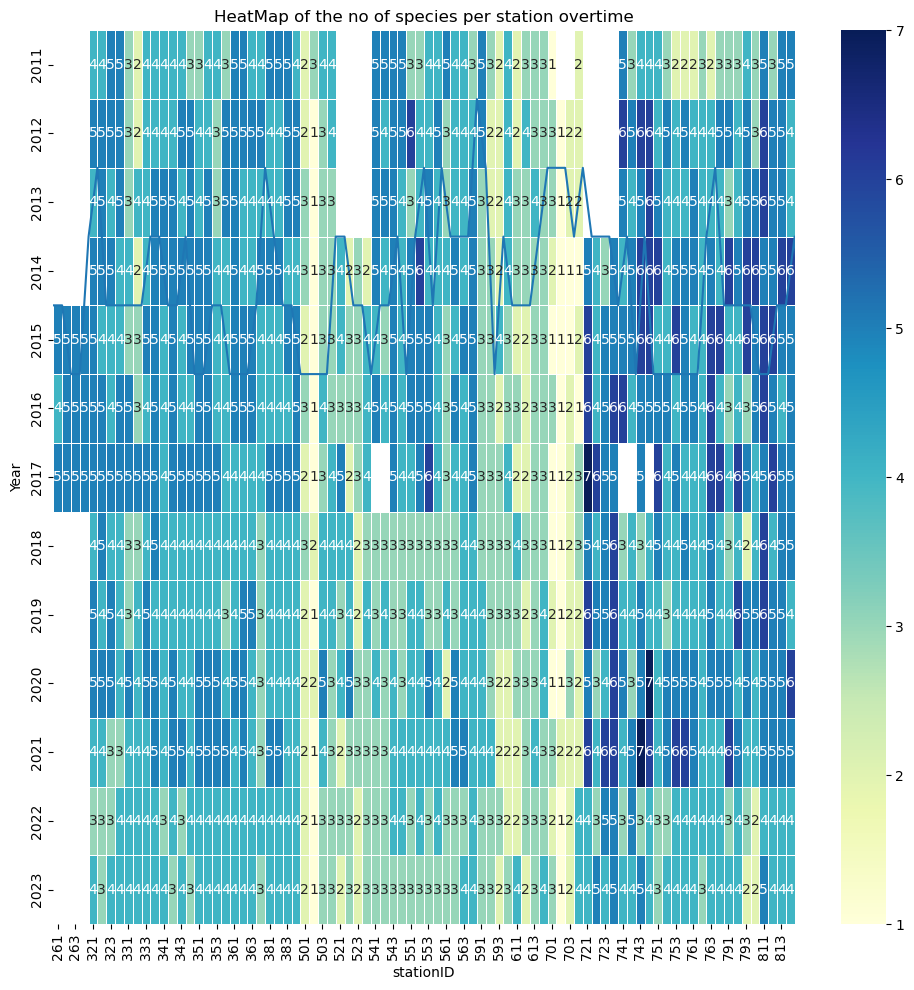

In [5]:
n1=df.groupby(['Year','StationID'])['sciName'].nunique()
print(n1)
map_data=n1.unstack()
n1.plot(figsize=(10,10),)
sns.heatmap(map_data,annot=True,cmap='YlGnBu',linewidths=0.5)
plt.title("HeatMap of the no of species per station overtime")
plt.xlabel('stationID')
plt.ylabel('Year')
plt.tight_layout()
plt.show()

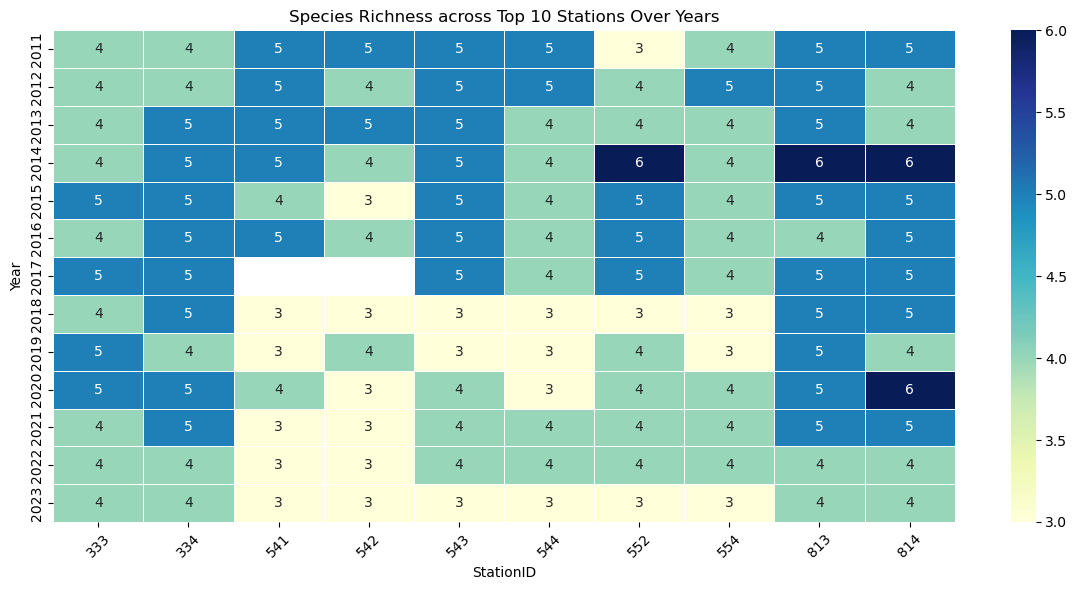

In [6]:
top_stations=df['StationID'].value_counts().head(10).index
filtered_stations=df[df['StationID'].isin(top_stations)]
pivot=filtered_stations.groupby(['Year','StationID'])['sciName'].nunique().unstack()
plt.figure(figsize=(12, 6))
sns.heatmap(pivot, annot=True, cmap="YlGnBu", linewidths=0.5)
plt.title("Species Richness across Top 10 Stations Over Years")
plt.xlabel("StationID")
plt.ylabel("Year")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

->Between 2013-2016, species richness was relatively high across most stations.

->A noticeable dip around 2018–2020, likely due to environmental stressors or sampling reduction.

->Station 814 remained relatively rich in species consistently from 2014–2021.

->Overall, richness seems to be stabilizing post-2020, though slightly lower than the 2013–2016 peak.

In [7]:
x=df['sciName'].unique()
octocoral_df = df[df['sciName'].str.contains(
    'Eunicea|Pseudopterogorgia|Pseudoplexaura|Gorgonia', case=False)]
#print(octocoral_df)
print(octocoral_df['sciName'].value_counts())
density_by_station=octocoral_df.groupby(['Year','StationID'])['sciName'].count().reset_index()
print(density_by_station)
density_by_station.rename(columns={"sciName":"ObservationCount"},inplace=True)
print(density_by_station.head(5))

sciName
Pseudopterogorgia americana    50883
Gorgonia ventalina             33710
Pseudopterogorgia bipinnata    13726
Eunicea flexuosa                5871
Pseudoplexaura porosa           3181
Eunicea calyculata               758
Name: count, dtype: int64
      Year  StationID  sciName
0     2011        321       80
1     2011        322       72
2     2011        323       60
3     2011        324       82
4     2011        331       22
...    ...        ...      ...
1016  2023        794      106
1017  2023        811      110
1018  2023        812      155
1019  2023        813      231
1020  2023        814      174

[1021 rows x 3 columns]
   Year  StationID  ObservationCount
0  2011        321                80
1  2011        322                72
2  2011        323                60
3  2011        324                82
4  2011        331                22


<function matplotlib.pyplot.show(close=None, block=None)>

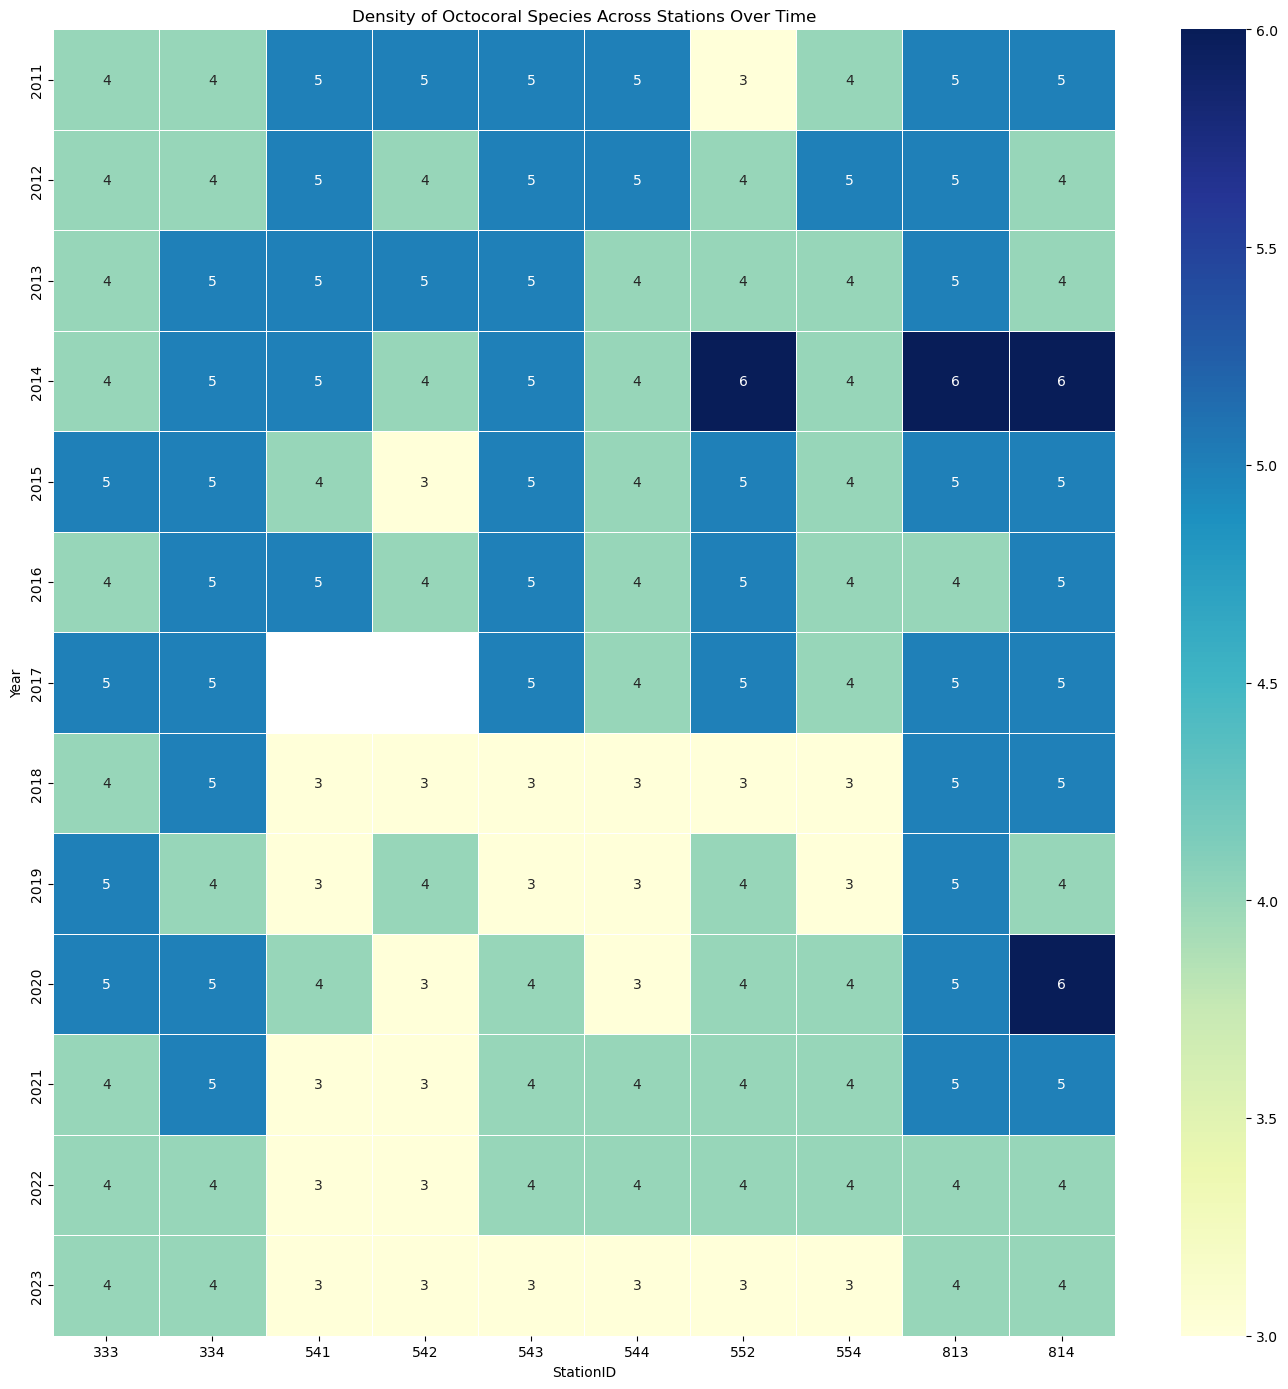

In [8]:
density_by_station_pivot=density_by_station.pivot(index='Year',columns='StationID',values='ObservationCount')
top_stations = df['StationID'].value_counts().head(10).index
filtered_df = df[df['StationID'].isin(top_stations)]
density_by_station = filtered_df.groupby(['Year', 'StationID'])['sciName'].nunique().reset_index()
density_by_station.rename(columns={'sciName': 'ObservationCount'}, inplace=True)
density_by_station_pivot = density_by_station.pivot(index='Year', columns='StationID', values='ObservationCount')
plt.figure(figsize=(14,14))
sns.heatmap(density_by_station_pivot,cmap="YlGnBu",annot=True,linewidths=0.5)
plt.title('Density of Octocoral Species Across Stations Over Time')
plt.xlabel('StationID')
plt.ylabel('Year')
plt.tight_layout()
plt.show